## Core Homework 2 (Problem 1 - 5)
    - I will try to use markdown to keep it as organized as possible
    - Some will likely not require code

### Problem 1:
A & D are real square n x n matricies.
 - (a) Suppose A is symmetric and has n distinct e-values. Find a two term expansion of eigenvalues of the perturbed matrix A + epsilonD where D is positive definite.
 - AKA find Rayleigh-Schrodinger series for the eigenvalues

In [3]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.animation as animation
from scipy.integrate import quad
import pandas as pd
import os
import shutil
import glob
style.use('dark_background')

In [4]:
def show_outputs():
    #need a bunch of symbols here
    n, i, k = sp.symbols('n i k', integer=True)
    e = sp.symbols('varepsilon')  #perturb symbol/param
    A = sp.MatrixSymbol('A', n, n)  #square matrix
    D = sp.MatrixSymbol('D', n, n)  #square perturb matrix
    v = sp.MatrixSymbol('v', n, 1)  #evector
    lam = sp.symbols('lambda', cls=sp.Function)  #perturbed eval funct
    lam_0 = sp.symbols('lambda_0')  # unperturbed eval

    #expansion i show in step 1
    lam_exp = lam_0 + e * sp.Symbol('lambda_1') + e**2 * sp.Symbol('lambda_2') + sp.O(e**3)
    print_eq1 = sp.Eq(A + e * D, lam_exp)
    

    #apply eigenval equation
    eig_eq = sp.Eq((A + e * D) * v, lam_exp * v)
    sp.pprint(eig_eq)

    #1st order correctg
    lambda_1 = sp.Symbol('lambda_1')
    first_order = sp.Eq(lambda_1, (v.T * D * v)[0,0])
    sp.pprint(first_order)

    #2nd order correct
    lambda_2 = sp.Symbol('lambda_2')
    sum_expr = sp.Sum(((v.T * D * sp.MatrixSymbol(f'v_k', n, 1)) * (sp.MatrixSymbol(f'v_k', n, 1).T * D * v))[0,0] / (lam_0 - sp.Symbol(f'lambda_k')), (k, 1, n))
    second_order = sp.Eq(lambda_2, sum_expr)
    sp.pprint(second_order)


show_outputs()


                       ⎛             2                         ⎛          3⎞⎞  
(varepsilon⋅D + A)⋅v = ⎝λ₂⋅varepsilon  + λ₁⋅varepsilon + λ₀ + O⎝varepsilon ⎠⎠⋅v
     n - 1  n - 1                                   
      ___    ___                                    
      ╲      ╲                                      
       ╲      ╲                                     
λ₁ =   ╱      ╱    (D)[i₁, i₂]⋅(v)[i₁, 0]⋅(v)[i₂, 0]
      ╱      ╱                                      
      ‾‾‾    ‾‾‾                                    
     i₂ = 0 i₁ = 0                                  
        n                                                                      ↪
     _______                                                                   ↪
     ╲                                                                         ↪
      ╲      n - 1  n - 1    0    n - 1  n - 1                                 ↪
       ╲      ___    ___    ___    ___    ___                                  ↪
        ╲  

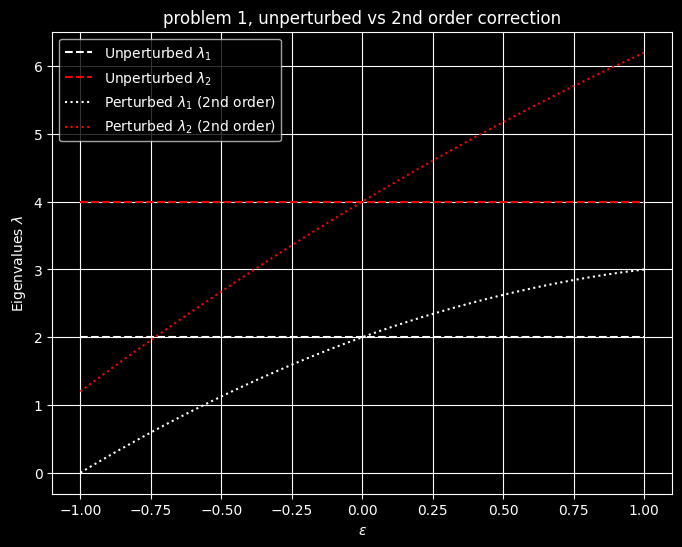

In [5]:
#unperturbed evalues from a arbitrary
lambda_0_1 = 2
lambda_0_2 = 4

#arbitrary 1st and 22nd order correction
#from here to read up: https://physics.stackexchange.com/questions/349255/second-order-perturbation-theory
lambda_1_1 = 1.5
lambda_1_2 = 2.5

lambda_2_1 = -0.5
lambda_2_2 = -0.3

#range of ep.
epsilon_values = np.linspace(-1, 1, 100)

#evector and evalues w/ found expansion from hw
perturbed_1 = lambda_0_1 + epsilon_values * lambda_1_1 + epsilon_values**2 * lambda_2_1
perturbed_2 = lambda_0_2 + epsilon_values * lambda_1_2 + epsilon_values**2 * lambda_2_2

#we can diagnoalize for exact evals, easy peasy
A = np.array([[3, 1], [1, 2]])
D = np.array([[2, 0], [0, 1]])
exact_eigenvalues = np.array([np.linalg.eigvalsh(A + e * D) for e in epsilon_values])


plt.figure(figsize=(8, 6))

#plot the unperterbed for 1 and 2
plt.plot(epsilon_values, [lambda_0_1] * len(epsilon_values), '--', label=r'Unperturbed $\lambda_1$', color='white')
plt.plot(epsilon_values, [lambda_0_2] * len(epsilon_values), '--', label=r'Unperturbed $\lambda_2$', color='red')

#plot corrections for 1 and 2
plt.plot(epsilon_values, perturbed_1, label=r'Perturbed $\lambda_1$ (2nd order)', linestyle='dotted', color='white')
plt.plot(epsilon_values, perturbed_2, label=r'Perturbed $\lambda_2$ (2nd order)', linestyle='dotted', color='red')

plt.xlabel(r'$\varepsilon$')
plt.ylabel(r'Eigenvalues $\lambda$')
plt.title('problem 1, unperturbed vs 2nd order correction')
plt.legend()
plt.grid()
plt.savefig('perturbed_vs_unperturbed_correction_p1.png')
plt.show()


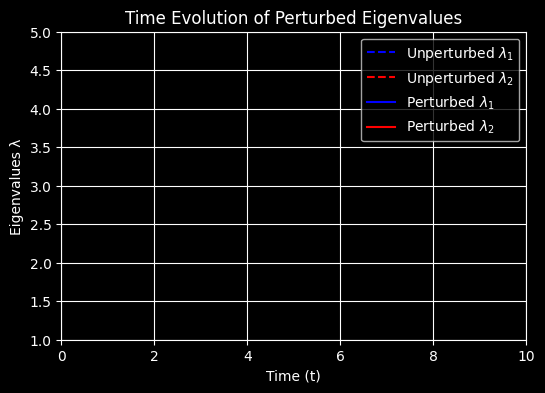

In [6]:


#time range
t_values = np.linspace(0, 10, 100)

#let epsilon vary as function of time (sin here but arbitrary) added noise
epsilon_values = 0.5 * np.sin(0.5 * t_values)#*np.random.rand()

#evalues over time
perturbed_1_t = lambda_0_1 + epsilon_values * lambda_1_1 + epsilon_values**2 * lambda_2_1
perturbed_2_t = lambda_0_2 + epsilon_values * lambda_1_2 + epsilon_values**2 * lambda_2_2

#fig ax call
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_xlim(0, 10)
ax.set_ylim(1, 5)
ax.set_xlabel('Time (t)')
ax.set_ylabel('Eigenvalues λ')
ax.grid(True)
ax.set_title('Time Evolution of Perturbed Eigenvalues')

#lines need four
line1, = ax.plot([], [], 'b--', label=r'Unperturbed $\lambda_1$')
line2, = ax.plot([], [], 'r--', label=r'Unperturbed $\lambda_2$')
line3, = ax.plot([], [], 'b', label=r'Perturbed $\lambda_1$')
line4, = ax.plot([], [], 'r', label=r'Perturbed $\lambda_2$')

ax.legend()

#ani funct
def update(frame):
    t_slice = t_values[:frame]  # Up to the current time step
    line1.set_data(t_slice, [lambda_0_1] * len(t_slice))
    line2.set_data(t_slice, [lambda_0_2] * len(t_slice))
    line3.set_data(t_slice, perturbed_1_t[:frame])
    line4.set_data(t_slice, perturbed_2_t[:frame])
    return line1, line2, line3, line4

#call ani
ani = animation.FuncAnimation(fig, update, frames=len(t_values), interval=50)

#save
gif_path = "perturbation_evolution.gif"
ani.save(gif_path, writer='pillow', fps=20)

### Problem 2

In [7]:
#symbolss
n, hbar, omega, q, E, m = sp.symbols('n hbar omega q E m', real=True, positive=True)

#orginal energy levels
E_n0 = hbar * omega * (n + sp.Rational(1/2))
print('OG energy level = ')
display(E_n0)


#first order shift
E_n1 = 0  #we know <n|x|n> = 0
print('1st energy level is zero:')
display(E_n1)

#2nd order shift
E_n2 = - (q**2 * E**2) / (2 * m * omega**2)
print('2nd energy level:')
display(E_n2)

#thrm. result
E_n_perturb = E_n0 + E_n1 + E_n2
print('thm result:')
display(E_n_perturb)

#exact solution
E_n_exact = hbar * omega * (n + 1/2) - (q**2 * E**2) / (2 * m * omega**2)
print('exact result')
display(E_n_exact)

#check and display equality
verification = sp.simplify(E_n_perturb - E_n_exact) == 0
display(verification)

OG energy level = 


hbar*omega*(n + 1/2)

1st energy level is zero:


0

2nd energy level:


-E**2*q**2/(2*m*omega**2)

thm result:


-E**2*q**2/(2*m*omega**2) + hbar*omega*(n + 1/2)

exact result


-E**2*q**2/(2*m*omega**2) + hbar*omega*(n + 0.5)

True

## Problem 3:
- asking to study logarithmic perturbation expansions from Imbo & Sukhatme, 1984



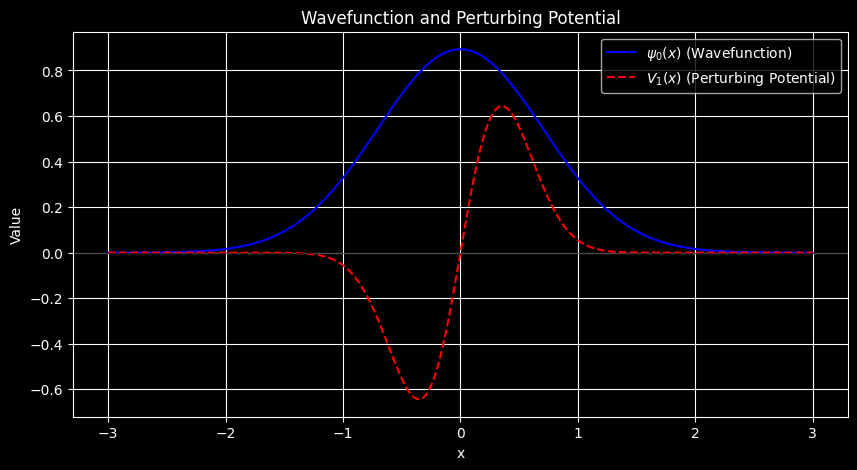

-0.4472135954999579 -0.4472135954999579


In [8]:


lambda_val = 2
alpha_val = 3
gamma_val = 4

def psi0_num(x, lambda_):
    return (lambda_ / np.pi)**(1/4) * np.exp(-lambda_ * x**2 / 2)

def V1_num(x, alpha, gamma):
    return alpha * x * np.exp(-gamma * x**2)

def E1_integrand(x, lambda_, alpha, gamma):
    return V1_num(x, alpha, gamma) * psi0_num(x, lambda_)**2

E1_num, _ = quad(E1_integrand, -np.inf, np.inf, args=(lambda_val, alpha_val, gamma_val))
E2_num = - (1/4) * (E1_num + lambda_val)**2 * (lambda_val / (lambda_val + 2 * gamma_val))**(1/2)

x_vals = np.linspace(-3, 3, 400)
psi0_values = psi0_num(x_vals, lambda_val)
V1_values = V1_num(x_vals, alpha_val, gamma_val)

plt.figure(figsize=(10, 5))
plt.plot(x_vals, psi0_values, label=r'$\psi_0(x)$ (Wavefunction)', color='blue')
plt.plot(x_vals, V1_values, label=r'$V_1(x)$ (Perturbing Potential)', color='red', linestyle='dashed')
plt.xlabel('x')
plt.ylabel('Value')
plt.title('Wavefunction and Perturbing Potential')
plt.axhline(0, color='black', linewidth=0.5)
plt.legend()
plt.grid()
plt.savefig('problem_3_wave_log_with_perturb.png')
plt.show()

correct_E1 = 0
correct_E2 = - (1/4) * (lambda_val ** 2) * (lambda_val / (lambda_val + 2 * gamma_val))**(1/2)

print(E2_num, correct_E2)


## Problem 4


'Part (a) - Unperturbed Eigenvalues:'

{V₀: 2, 4⋅V₀: 1}


'Part (a) - Unperturbed Eigenvectors:'

[(V0,
  2,
  [Matrix([
   [1],
   [0],
   [0]]),
   Matrix([
   [0],
   [1],
   [0]])]),
 (4*V0,
  1,
  [Matrix([
   [0],
   [0],
   [1]])])]

⎡⎛       ⎡⎡1⎤  ⎡0⎤⎤⎞  ⎛         ⎡⎡0⎤⎤⎞⎤
⎢⎜       ⎢⎢ ⎥  ⎢ ⎥⎥⎟  ⎜         ⎢⎢ ⎥⎥⎟⎥
⎢⎜V₀, 2, ⎢⎢0⎥, ⎢1⎥⎥⎟, ⎜4⋅V₀, 1, ⎢⎢0⎥⎥⎟⎥
⎢⎜       ⎢⎢ ⎥  ⎢ ⎥⎥⎟  ⎜         ⎢⎢ ⎥⎥⎟⎥
⎣⎝       ⎣⎣0⎦  ⎣0⎦⎦⎠  ⎝         ⎣⎣1⎦⎦⎠⎦


'Part (b) - First Order Correction for E3:'

0


'Part (c) - First Order Corrections for Degenerate Subspace:'

{-2*V0: 1, 2*V0: 1}

'Part (c) - Corrected Eigenvectors in Degenerate Subspace:'

[(-2*V0,
  1,
  [Matrix([
   [-1],
   [ 1]])]),
 (2*V0,
  1,
  [Matrix([
   [1],
   [1]])])]

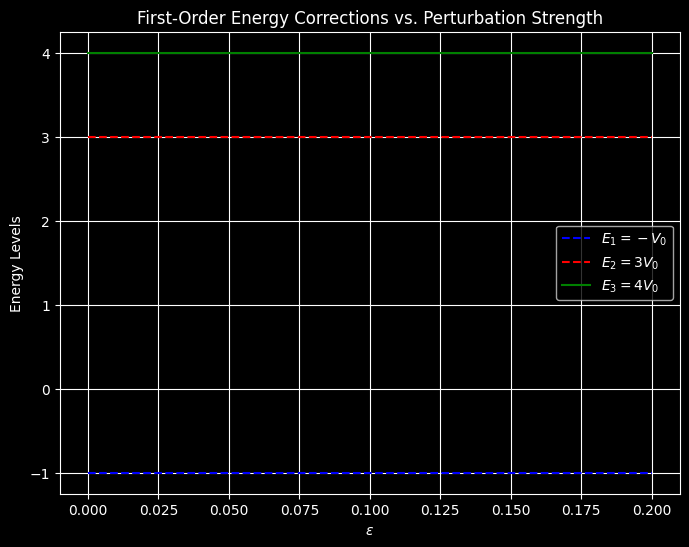

In [9]:
#part a unperturbed hamiltonian
V0 = sp.symbols('V0')
H0 = sp.Matrix([[1, 0, 0],
                [0, 1, 0],
                [0, 0, 4]]) * V0

E0, P0 = H0.eigenvals(), H0.eigenvects()
display("Part (a) - Unperturbed Eigenvalues:")
sp.pprint(E0)
display("Part (a) - Unperturbed Eigenvectors:", P0)
sp.pprint(P0)

#first order correction E3 part B
H_prime = sp.Matrix([[0, 2, 0],
                     [2, 0, 3],
                     [0, 3, 0]]) * V0

E3_first_order = H_prime[2, 2]  #<ψ3|H'|ψ3>
display("Part (b) - First Order Correction for E3:")
sp.pprint(E3_first_order)

#degen perturb thry.
H_deg = H_prime[:2, :2]
E_deg, P_deg = H_deg.eigenvals(), H_deg.eigenvects()
display("Part (c) - First Order Corrections for Degenerate Subspace:", E_deg)
display("Part (c) - Corrected Eigenvectors in Degenerate Subspace:", P_deg)

#energy correction v. epsilon
V0_num = 1
epsilon_values = np.linspace(0, 0.2, 100)
E1 = -V0_num * np.ones_like(epsilon_values)
E2 = 3 * V0_num * np.ones_like(epsilon_values)
E3 = 4 * V0_num * np.ones_like(epsilon_values)

plt.figure(figsize=(8, 6))
plt.plot(epsilon_values, E1, label=r"$E_1 = -V_0$", linestyle='dashed', color='blue')
plt.plot(epsilon_values, E2, label=r"$E_2 = 3V_0$", linestyle='dashed', color='red')
plt.plot(epsilon_values, E3, label=r"$E_3 = 4V_0$", linestyle='solid', color='green')
plt.xlabel(r"$\epsilon$")
plt.ylabel("Energy Levels")
plt.title("First-Order Energy Corrections vs. Perturbation Strength")
plt.legend()
plt.grid()
plt.show()


## Problem 5:
- Given the Hamiltonian Matrix do eigen vects/vals of unperturbed.
- Find corrections to energy for each eigenstate, find first non-vanishing terms.

In [10]:
epsilon = sp.Symbol('epsilon')

H = V0 * sp.Matrix([
    [3, epsilon, 0, 0],
    [epsilon, 3, 2*epsilon, 0],
    [0, 2*epsilon, 5, epsilon],
    [0, 0, epsilon, 7]
])

display('The orginal/given Hamiltonian):',H)

#now we show unperturbed Hamiltonian (e = 0)
H_0 = H.subs(epsilon,0)
display('The unperturbed hamiltonian (e=0) is:', H_0)

#perturbation matrix H' is just H - H0
H_prime = H - H_0
display('The perturbation matrix (H_prime = H - H_0) is:' , H_prime)

#find evals and evectors of H0 which is undistrubed hamiltonian:
eigenvalues = H_0.eigenvals()
eigenvectors = H_0.eigenvects()



#formatting only, convert to df for table display
eigenvalues_df = pd.DataFrame(list(eigenvalues.items()), columns=['Eigenvalue', 'Multiplicity'])

#same for eigenvectors into a df
eigenvectors_data = []
for evalue, multiplicity, evectors in eigenvectors:
    for evector in evectors:
        eigenvectors_data.append([evalue, multiplicity, evector])

eigenvectors_df = pd.DataFrame(eigenvectors_data, columns=['Eigenvalue', 'Multiplicity', 'Eigenvector'])

#display as tables
print("Eigenvalues of Unperturbed (H0):")
display(eigenvalues_df)

print("\nEigenvectors of Unperturbed (H0):")
display(eigenvectors_df)





##moving on to part b, we will let sympy compute first order corrections and second order
E_1_corrections = []
for i, ev in enumerate(eigenvectors):
    #get eigenvector
    ev_vectors = ev[2]  #list of eigen-vects for eigen-vals
    for vec in ev_vectors:
        E_1 = (vec.T * H_prime * vec)[0]  #exp. val of H' in e-state (<n|H'|n>) Expectation value of H' in eigenstate
        E_1_corrections.append((ev[0], E_1.simplify()))

# Compute second-order energy corrections if first order is zero
E_2_corrections = []
for i, ev_n in enumerate(eigenvectors):
    ev_n_vectors = ev_n[2]  # Extract eigenvectors for the eigenvalue
    for vec_n in ev_n_vectors:
        E_2 = 0
        for j, ev_m in enumerate(eigenvectors):
            if i != j:
                ev_m_vectors = ev_m[2]  # Extract eigenvectors for eigenvalue j
                for vec_m in ev_m_vectors:
                    numerator = (vec_m.T * H_prime * vec_n)[0]**2
                    denominator = (ev_n[0] - ev_m[0])
                    E_2 += numerator / denominator
        E_2_corrections.append((ev_n[0], E_2.simplify()))

#now second order if and only if 1 is zero which it is in this case
E_2_corrections = []
for i, ev_n in enumerate(eigenvectors):
    ev_n_vectors = ev_n[2]  #extract e-vects for e-value
    for vec_n in ev_n_vectors:
        E_2 = 0
        for j, ev_m in enumerate(eigenvectors):
            if i != j: #delta
                ev_m_vectors = ev_m[2]  #eigenvector for jth evalue
                for vec_m in ev_m_vectors:
                    numerator = (vec_m.T * H_prime * vec_n)[0]**2
                    denominator = (ev_n[0] - ev_m[0])
                    E_2 += (numerator / denominator)
        E_2_corrections.append((ev_n[0], E_2.simplify()))


#df again for nice formatting
E_1_corrections_df = pd.DataFrame(E_1_corrections, columns=['Eigenvalue', 'First-Order Correction'])
display("First-Order Energy Corrections:", E_1_corrections_df)


#keep it out of df so we can show epsilon
print('2nd Order Energy Corrections (E-value, 2nd order correction term:):\n\n')
sp.pprint(E_2_corrections)


'The orginal/given Hamiltonian):'

Matrix([
[      3*V0,   V0*epsilon,            0,          0],
[V0*epsilon,         3*V0, 2*V0*epsilon,          0],
[         0, 2*V0*epsilon,         5*V0, V0*epsilon],
[         0,            0,   V0*epsilon,       7*V0]])

'The unperturbed hamiltonian (e=0) is:'

Matrix([
[3*V0,    0,    0,    0],
[   0, 3*V0,    0,    0],
[   0,    0, 5*V0,    0],
[   0,    0,    0, 7*V0]])

'The perturbation matrix (H_prime = H - H_0) is:'

Matrix([
[         0,   V0*epsilon,            0,          0],
[V0*epsilon,            0, 2*V0*epsilon,          0],
[         0, 2*V0*epsilon,            0, V0*epsilon],
[         0,            0,   V0*epsilon,          0]])

Eigenvalues of Unperturbed (H0):


,Eigenvalue,Multiplicity
0,3*V0,2
1,5*V0,1
2,7*V0,1



Eigenvectors of Unperturbed (H0):


,Eigenvalue,Multiplicity,Eigenvector
0,3*V0,2,"[1, 0, 0, 0]"
1,3*V0,2,"[0, 1, 0, 0]"
2,5*V0,1,"[0, 0, 1, 0]"
3,7*V0,1,"[0, 0, 0, 1]"


'First-Order Energy Corrections:'

,Eigenvalue,First-Order Correction
0,3*V0,0
1,3*V0,0
2,5*V0,0
3,7*V0,0


2nd Order Energy Corrections (E-value, 2nd order correction term:):


⎡                             ⎛            2⎞  ⎛          2⎞⎤
⎢           ⎛             2⎞  ⎜      3⋅V₀⋅ε ⎟  ⎜      V₀⋅ε ⎟⎥
⎢(3⋅V₀, 0), ⎝3⋅V₀, -2⋅V₀⋅ε ⎠, ⎜5⋅V₀, ───────⎟, ⎜7⋅V₀, ─────⎟⎥
⎣                             ⎝         2   ⎠  ⎝        2  ⎠⎦


<>:28: SyntaxWarning: invalid escape sequence '\e'
<>:52: SyntaxWarning: invalid escape sequence '\e'
<>:28: SyntaxWarning: invalid escape sequence '\e'
<>:52: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipykernel_14247/3107282674.py:28: SyntaxWarning: invalid escape sequence '\e'
  ax.plot(epsilon_vals, E0 + E2, label=f'$E_{{{i+1}}}(\epsilon)$', color=colors[i])
/tmp/ipykernel_14247/3107282674.py:52: SyntaxWarning: invalid escape sequence '\e'
  ax.plot(epsilon_vals, E_corrected, label=f'$E_{{{i+1}}}(\epsilon)$', color=colors[i])


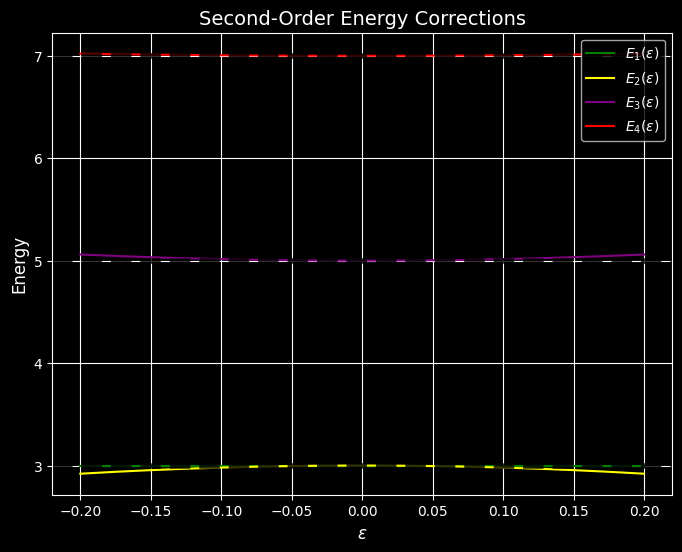

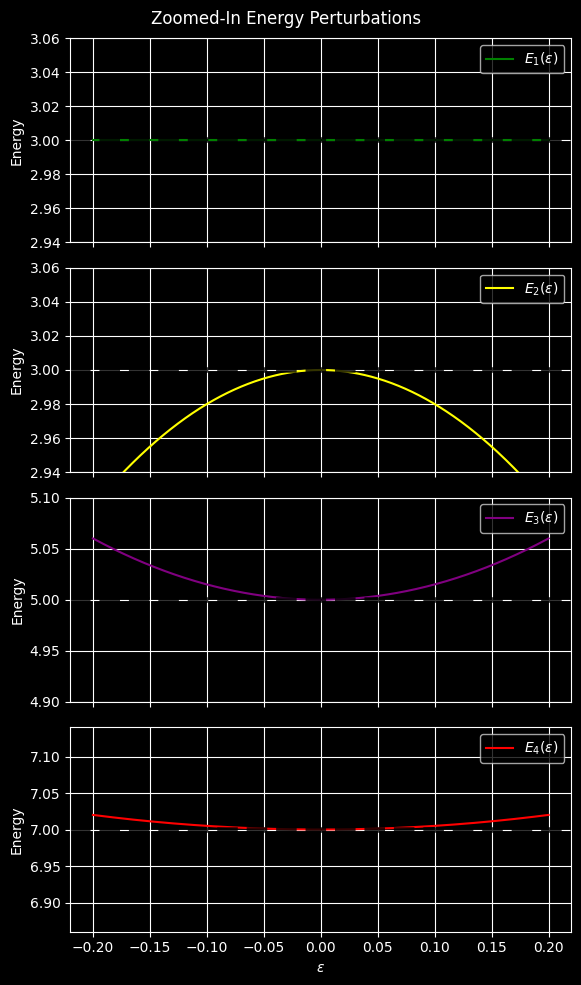

In [11]:
# plots for number 5:
# lets just feel it out, do one all together
# oops looks like yvals are too large to really see deviations, will add subplots later for each
#constants
V0_val = 1  #arbitrary, fixed value
epsilon_vals = np.linspace(-0.2, 0.2, 1000)  #smol range

#unperturbed energy levels already found
E0_vals = np.array([3*V0_val, 3*V0_val, 5*V0_val, 7*V0_val])

#2nd order corr
E2_corrections = np.array([
    np.zeros_like(epsilon_vals),  #all first is zero
    -2 * V0_val * epsilon_vals**2, 
    (3/2) * V0_val * epsilon_vals**2, 
    (1/2) * V0_val * epsilon_vals**2
])

#color style
colors = ['green', 'yellow', 'purple', 'red']
dashed_line_color = 'black'
dashed_line_width = 4

#main plot
fig, ax = plt.subplots(figsize=(8, 6))

for i, (E0, E2) in enumerate(zip(E0_vals, E2_corrections)):
    ax.plot(epsilon_vals, E0 + E2, label=f'$E_{{{i+1}}}(\epsilon)$', color=colors[i])

# Add dashed lines for unperturbed energy levels
ax.axhline(y=3*V0_val, color=dashed_line_color, linestyle='dashed', linewidth=dashed_line_width, alpha=0.8)
ax.axhline(y=5*V0_val, color=dashed_line_color, linestyle='dashed', linewidth=dashed_line_width, alpha=0.8)
ax.axhline(y=7*V0_val, color=dashed_line_color, linestyle='dashed', linewidth=dashed_line_width, alpha=0.8)

ax.set_xlabel(r'$\epsilon$', fontsize=12)
ax.set_ylabel('Energy', fontsize=12)
ax.set_title('Second-Order Energy Corrections', fontsize=14)
ax.legend()
ax.grid(True)


plt.show()

#subplot/zoomed in view.
fig, axes = plt.subplots(4, 1, figsize=(6, 10), sharex=True)

for i, ax in enumerate(axes):
    E_corrected = E0_vals[i] + E2_corrections[i]
    E_min = E0_vals[i] * 0.98  #%below
    E_max = E0_vals[i] * 1.02  #%above

    ax.plot(epsilon_vals, E_corrected, label=f'$E_{{{i+1}}}(\epsilon)$', color=colors[i])
    ax.axhline(y=E0_vals[i], color=dashed_line_color, linestyle='dashed', linewidth=dashed_line_width, alpha=0.8)
    ax.set_ylim(E_min, E_max)  #zoom range
    ax.set_ylabel('Energy')
    ax.legend()
    ax.grid(True)

axes[-1].set_xlabel(r'$\epsilon$')

plt.suptitle('Zoomed-In Energy Perturbations')
plt.tight_layout()
plt.show()


#### Housekeeping

In [12]:

#file moving for housekeeping
def move_plots():
    output_dir = 'graphs'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    #all gif and png
    files_to_move = glob.glob('*.png') + glob.glob('*.gif')

    for file in files_to_move:
        destination = os.path.join(output_dir, file)

        #if exists, replace
        if os.path.exists(destination):
            os.remove(destination)

        #move it
        shutil.move(file, destination)
        print(f'Moved {file} to {output_dir}')

#housekeeping for plts  
move_plots()



Moved perturbed_vs_unperturbed_correction_p1.png to graphs
Moved problem_3_wave_log_with_perturb.png to graphs
Moved perturbation_evolution.gif to graphs
